In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('adult_data.csv')
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [90]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [91]:
def handle_capital_gain(df):
    df['capital_gain'] = np.where(df['capital_gain'] == 0, np.nan, df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan, 0)

In [92]:
handle_capital_gain(df)

In [93]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


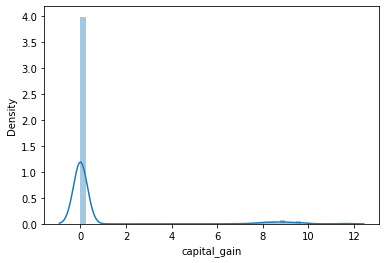

In [94]:
sns.distplot(df.capital_gain);

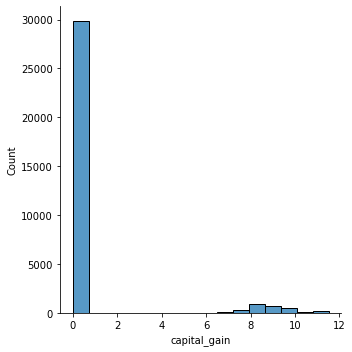

In [95]:
sns.displot(df.capital_gain);

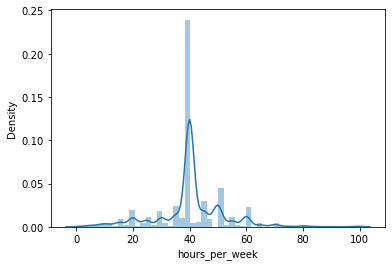

In [96]:
sns.distplot(df.hours_per_week);

<AxesSubplot:xlabel='hours_per_week'>

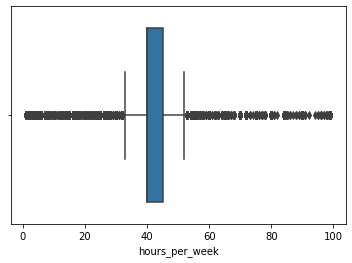

In [97]:
sns.boxplot(df['hours_per_week'])

In [98]:
def remove_outliers_per_week(df):
    IQR = df.hours_per_week.quantile(0.75) - df.hours_per_week.quantile(0.25)
    print("IQR is",IQR)
    lower_range = df.hours_per_week.quantile(0.25) - (1.5*IQR)
    upper_range = df.hours_per_week.quantile(0.75) + (1.5*IQR)
    print(lower_range,upper_range)
    df.loc[df.hours_per_week <= lower_range,"hours_per_week"] = lower_range
    df.loc[df.hours_per_week >= upper_range,"hours_per_week"] = upper_range
    

In [99]:
remove_outliers_per_week(df)

IQR is 5.0
32.5 52.5


<AxesSubplot:xlabel='hours_per_week'>

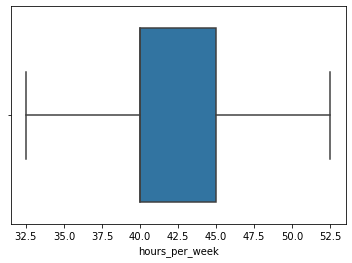

In [100]:
sns.boxplot(df['hours_per_week'])

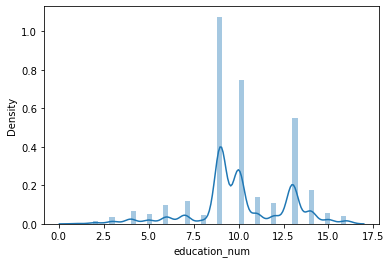

In [101]:
sns.distplot(df['education_num']);

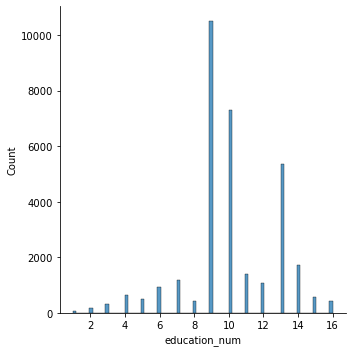

In [102]:
sns.displot(df['education_num'])

In [103]:
def remove_outlier_education_num(df):
    IQR = df['education_num'].quantile(0.75) - df['education_num'].quantile(0.25)
    print(IQR)
    lower_range = df['education_num'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['education_num'].quantile(0.75) + (1.5 * IQR)
    print(lower_range,upper_range)
    df.loc[df['education_num'] <= lower_range, 'education_num'] = lower_range
    df.loc[df['education_num'] >= upper_range, 'education_num'] = upper_range

In [104]:
remove_outlier_education_num(df)

3.0
4.5 16.5


<AxesSubplot:xlabel='education_num'>

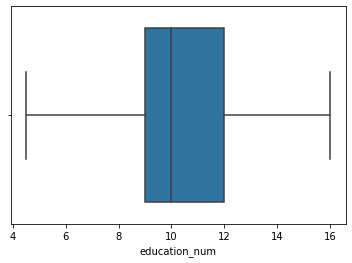

In [105]:
sns.boxplot(df['education_num'])

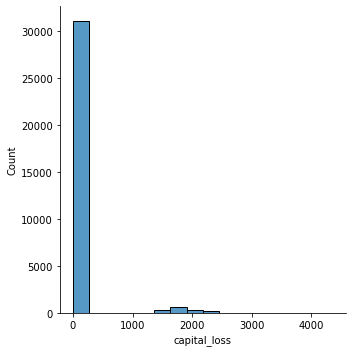

In [106]:
sns.displot(df['capital_loss'])

In [107]:
def capital_loss_log(df):
    df['capital_loss'] = np.where(df['capital_loss'] == 0, np.nan, df['capital_loss'])
    df['capital_loss'] = np.log(df['capital_loss'])
    df['capital_loss'] = df['capital_loss'].replace(np.nan, 0)

In [108]:
capital_loss_log(df)

In [109]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


<AxesSubplot:xlabel='capital_loss'>

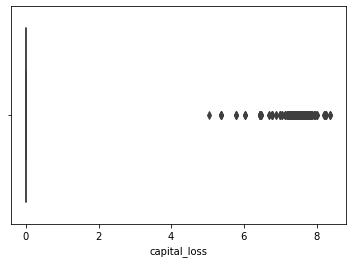

In [110]:
sns.boxplot(df['capital_loss'])

In [113]:
def remove_outlier_capital_loss(df):
    IQR = df['capital_loss'].quantile(0.75) - df['capital_loss'].quantile(0.25)
    print(IQR)
    lower_range = df['capital_loss'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['capital_loss'].quantile(0.75) + (1.5 * IQR)
    print(lower_range,upper_range)
    df.loc[df['capital_loss'] <= lower_range, 'capital_loss'] = lower_range
    df.loc[df['capital_loss'] >= upper_range, 'capital_loss'] = upper_range

In [112]:
remove_outlier_capital_loss(df)

0.0
0.0 0.0


In [114]:
def feature_engineering(df):
    
    ## convert the salary into 1 if salary is greater then 50K else 0
#     df['salary'] = df['salary'].replace(' >50K', '>50K')
#     df['salary'] = np.where(df['salary'] > '50K', 1, 0)
    
    ## convert the sex column into 0 and 1, if male then 1 else 0
    df['sex'] = np.where(df['sex'] == " Male", 1, 0)
     
    ## do the label encoding in race column (0: 'White',1: 'Black',2: 'Asian-Pac-Islander',3:'Amer-Indian-Eskimo',4:'Other')
    label_enco_race = {value: key for key, value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(label_enco_race)
    
    ## {0: ' Not-in-family',1: ' Husband'2: ' Wife',3: ' Own-child',4: ' Unmarried',5: ' Other-relative
    label_enco_relation = {value: key for key, value in enumerate(df['relationship'].unique())}
    df['relationship'] = df['relationship'].map(label_enco_relation)
    
    ## {0: ' Adm-clerical',1: ' Exec-managerial',2: ' Handlers-cleaners',3: ' Prof-specialty',4: ' Other-service',5: ' Sales', 6: ' Craft-repair',7: ' Transport-moving',8: ' Farming-fishing',9: ' Machine-op-inspct', 10: ' Tech-support', 11: ' ?',12: ' Protective-serv',13: ' Armed-Forces', 14: ' Priv-house-serv'}
    df['occupation'] = np.where(df['occupation'] == ' ?', 'Missing', df['occupation'])
    label_enco_occu = {value: key for key, value in enumerate(df['occupation'].unique())}
    ## Replacing ? value with 'Missing'
    df['occupation'] = df['occupation'].map(label_enco_occu)
    
    ## {0: ' Never-married',1: ' Married-civ-spouse',2: ' Divorced',3: ' Married-spouse-absent',4: ' Separated',5: ' Married-AF-spouse',6: ' Widowed'}
    label_enco_marital_status = {value: key for key, value in enumerate(df['marital_status'].unique())}
    df['marital_status'] = df['marital_status'].map(label_enco_marital_status)
    
    label_enco_edu = {value: key for key, value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map(label_enco_edu)
    
    ## {0: ' State-gov'1: ' Self-emp-not-inc',2: ' Private',3: ' Federal-gov',4: ' Local-gov',5: ' ?',6: ' Self-emp-inc',7: ' Without-pay',8: ' Never-worked'}
    df['workclass'] = np.where(df['workclass'] == ' ?', 'Missing', df['workclass'])
    label_enco_workclass = {value: key for key, value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(label_enco_workclass)
    
    ## {' United-States': 0,' Cuba': 1,' Jamaica': 2,' India': 3,' ?': 4,' Mexico': 5,' South': 6,' Puerto-Rico': 7,' Honduras': 8,' England': 9,' Canada': 10,' Germany': 11,' Iran': 12,' Philippines': 13,' Italy': 14,' Poland': 15,' Columbia': 16,' Cambodia': 17,' Thailand': 18,' Ecuador': 19,' Laos': 20,' Taiwan': 21,' Haiti': 22,' Portugal': 23,' Dominican-Republic': 24,' El-Salvador': 25,' France': 26,' Guatemala': 27,' China': 28,' Japan': 29,' Yugoslavia': 30,' Peru': 31,' Outlying-US(Guam-USVI-etc)': 32,' Scotland': 33,' Trinadad&Tobago': 34,' Greece': 35,' Nicaragua': 36,' Vietnam': 37,' Hong': 38,' Ireland': 39,' Hungary': 40,' Holand-Netherlands': 41
    df['native_country'] = np.where(df['native_country'] == ' ?', 'Missing', df['native_country'])
    label_enco_workclass = {value: key for key, value in enumerate(df['native_country'].unique())}
    df['native_country'] = df['native_country'].map(label_enco_workclass)

In [115]:
feature_engineering(df)

In [118]:
df.drop(columns=["capital_loss"],inplace = True)

<AxesSubplot:>

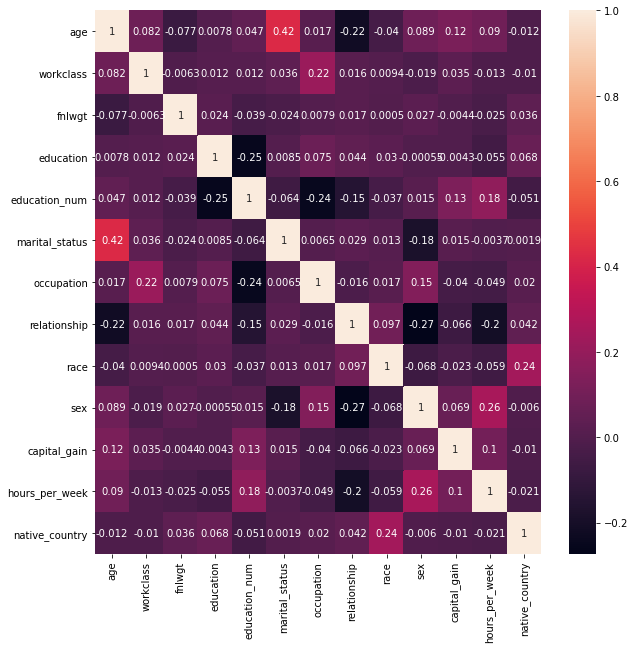

In [119]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [120]:
df = df.drop('fnlwgt', axis=1)

In [121]:
df.head(2)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,native_country,salary
0,39,0,0,13.0,0,0,0,0,1,7.684324,40.0,0,<=50K
1,50,1,0,13.0,1,1,1,0,1,0.000000,32.5,0,<=50K


In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [123]:
sc = StandardScaler()

In [124]:
X = df[['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
          'race', 'sex', 'capital_gain', 'hours_per_week', 'native_country']]

In [125]:
y = df['salary']

In [126]:
X = sc.fit_transform(X)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (26048, 12)
Test data shape: (6513, 12)


In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
lg_model = LogisticRegression()

In [133]:
lg_model.fit(X_train, y_train)

LogisticRegression()

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [135]:
y_pred = lg_model.predict(X_test)

In [136]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.8182097343773991
Confusion Matrix:
 [[4626  316]
 [ 868  703]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4942
        >50K       0.69      0.45      0.54      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513

